<h1>Function Approximation with a Linear Model</h1>
<h2>We would approximate sine function with a <b>Multiple Linear Regression model</h2>
<p>y=sin(x) is our <i>Target function</i>.<br><br>
y=w0 + w1*x + w2*x^2 result into our <i>Hypothesis set</i>(containing hypothesis functions amongst which our linear model will choose a function that closely corresponds to our <i>Target function</i>).<br><br>
x ranges from (0 , 2*pi).<br><br>
Also, we have considered two variables or features in our model, x and x^2 to make our multiple linear regression model simple and easy to understand.<br><br>
If you are not clear with these terms, have a look at my blog on <a href='https://medium.com/essence-of-learning/components-of-learning-3ced724813e1?source=collection_home---4------1-----------------------' >Components of learning</a>.</p>

In [2]:
import numpy as np

### Generate data

In [3]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    
    y=np.sin(x)
    return y

In [4]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    
    x=(2*np.pi)*(np.random.random(N))
    #print(x)
    yd=np.sin(x)
    return x, yd

### Plotting

In [5]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.show()
  
plotdata()

<Figure size 640x480 with 1 Axes>

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [6]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    A=[]
    for i in range(0,D+1):
      A.append(np.power(x,i))
      
      
    
    return np.array(A).T

### Estimate Weights
Estimate w from yd and A. Use the least square solution which is explained in this <a href='https://www.youtube.com/watch?v=FIbVs5GbBlQ&list=PLD63A284B7615313A&index=3'>vedio</a> by Yaser Abu-Mostafa(Caltech).

In [7]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    w=np.linalg.inv(A.T.dot(A)).dot(A.T.dot(yd))
    return w

### Estimate y from the model, given x

In [8]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    
    A=createA(x, len(w)-1)
    y=w.dot(A.T)
    return y

### Estimate Error
Find E as the mean squared error

In [9]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    
    mse=np.mean(np.power((y-yd),2))
    return mse

### Plotting


ERROR: 1.693542093976002e-05


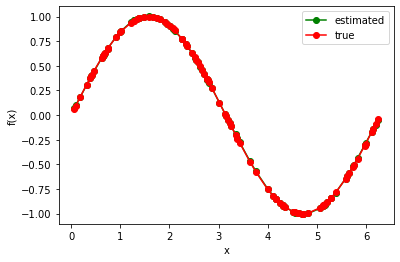

In [10]:
def plotModel(x, yd, y):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.show()
    
x,yd=generateX_fx(100)
A=createA(x, 6)
w=train_w(A, yd)
y=predict_y(w,x)
print('ERROR:',compute_mse(y, yd))
plotModel(x,yd,y)

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [11]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    x,yd=generateX_fx(N)
    A=createA(x, D)
    w=train_w(A, yd)
    y=predict_y(w,x)
    mse=compute_mse(y, yd)
    return x, y, yd, w, mse

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [12]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    x,yd=generateX_fx(Ntest)
    A=A=createA(x, len(w)-1)
    y=A.dot(w.T)
    mse=compute_mse(y, yd)
    
    return x, y, yd, mse

Visuals for Training dataset


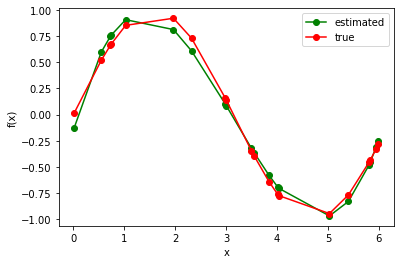

ERROR: 0.004985441394553785
-----------------------------------------------------
Visuals for Test dataset


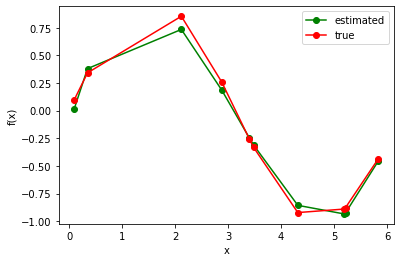

ERROR: 0.0037254060947845835


In [17]:
#Degree or the number of variables considered in this new model=3
#Here, you can play with the degrees
x, y, yd, w, mse = trainModel(20, 3)
print('Visuals for Training dataset')
plotModel(x,yd,y)
print('ERROR:',mse)
print('-----------------------------------------------------')
Ntest=10
x, y, yd, mse = testModel(Ntest, w)
print('Visuals for Test dataset')
plotModel(x,yd,y)
print('ERROR:',mse)

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

N= 3
mse_train: 0.9763206086211528
mse_test: 0.5768880875080603
N= 5
mse_train: 0.06820547473070242
mse_test: 0.056265009357787533
N= 10
mse_train: 5.3777162103780685e-09
mse_test: 0.000492021452589106
N= 30
mse_train: 1.7808053043757832e-05
mse_test: 2.089787016607188e-05


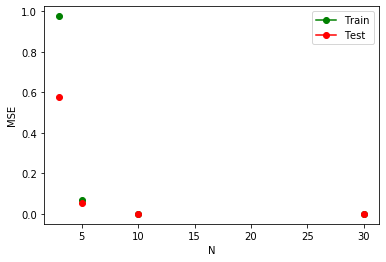

In [19]:
import matplotlib.pyplot as plt
for i in [3,5,10,30]:
  x,yd=generateX_fx(i)
  A=createA(x, 5)
  w=train_w(A, yd)
  y=predict_y(w,x)
  mse_train=compute_mse(y, yd)
  print('N=',i)
  print('mse_train:',mse_train)
  plt.plot(i,mse_train,'g-o')
  x,yd=generateX_fx(i)
  A=createA(x, len(w)-1)
  y=A.dot(w.T)
  mse_test=compute_mse(y, yd)
  print('mse_test:',mse_test)
  plt.plot(i,mse_test,'r-o')
plt.ylabel('MSE')
plt.xlabel('N')
plt.legend(['Train','Test'])
# plotdata()
plt.show()
  

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

D= 0
mse_train: 0.3566365024977588
mse_test: 0.38247243696960753
D= 1
mse_train: 0.219619467388038
mse_test: 0.27585129482866966
D= 2
mse_train: 0.15434254529951358
mse_test: 0.282709091574236
D= 4
mse_train: 0.0007507939756555841
mse_test: 0.009109006261907606
D= 7
mse_train: 3.308484542772562e-10
mse_test: 4.626534063203714e-09
D= 12
mse_train: 0.9809197201836121
mse_test: 1.61008165602489


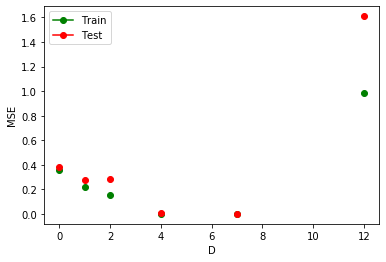

In [20]:
import matplotlib.pyplot as plt
for i in [0,1,2,4,7,12]:
  x,yd=generateX_fx(10)
  A=createA(x, i)
  w=train_w(A, yd)
  y=predict_y(w,x)
  mse_train=compute_mse(y, yd)
  print('D=',i)
  print('mse_train:',mse_train)
  plt.plot(i,mse_train,'g-o')
  x,yd=generateX_fx(10)
  A=createA(x, i)
  y=A.dot(w.T)
  mse_test=compute_mse(y, yd)
  print('mse_test:',mse_test)
  plt.plot(i,mse_test,'r-o')
plt.ylabel('MSE')
plt.xlabel('D')
plt.legend(['Train','Test'])
# plotdata()
plt.show()
